# Red Krapivsky-Redner-Leyvraz (KRL)

El modelo de Redes creado por P. L. Krapivsky, S. Redner, y  F. Leyvraz, fue inspirado en el modelo de Barabási–Albert para redes que crecen a partir de un enlace preferencial lineal de nodos (nodos nuevos se conectan con mayor probabilidad a nodos existentes con mayor grado). Para el modelo de KRL, se utiliza un enlace preferencial no lineal, el cual se define de la siguiente manera:

$$\Pi(k,t)=\left(\sum_{n=0}^{N(t)}k_n^{\alpha}\right)^{-1}k^\alpha$$

donde $N(t)$ es el número de nodos en la red al tiempo $t$ y $k_n$ es la conectividad del $n$-ésimo nodo existente. En palabras más simples, $\Pi(k,t)$ nos dice la probabilidad de que un nuevo nodo al tiempo $t$ se conecte con otro nodo ya existente de conectividad $k$. Al valor $C=\left(\sum_{n=0}^{N(t)}k_n^{\alpha}\right)^{-1}$ se le conoce como la constante de normalización para la regla de enlace. 

### **Inciso (a)**

Para esta primera parte, necesitamos crear un algoritmo que nos genere una red KRL para cada $\alpha\in\{0.5,1,1.5\}$. Comenzamos por importar las librerías que nos serán de ayuda para construir la red. 

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import random 

Para poder crear Redes, primero comenzaremos por crear un programa que nos permita trabajar con redes y sus nodos como objetos de tipo *Class*. Necesitamos agregar los métodos y atributos que más nos ayuden a analizar nuestra gráfica y con ello, definir en enlace preferencial para redes KRL.

In [74]:
# Definimos a los Nodos como un objeto de tipo "Class"
class Node:
    def __init__(self, key):
        self.key = key
        self.neighbors = {}

    # Metodo para agregar vecinos
    def add_neighbor(self, neighbor, weight=1):
        self.neighbors[neighbor] = weight

    # Atributo de los nodos que nos permite ver su conectividad 
    def degree(self):
        return len(self.neighbors)

    def __repr__(self):
        return f"Node({self.key})"

# Definimos a las Redes como un objeto de tipo "Class"
class Graph:
    def __init__(self):
        self.nodes = {}

    # Método para agregar nodos
    def add_node(self, key):
        if key not in self.nodes:
            self.nodes[key] = Node(key)

    # Método para agregar enlaces
    def add_edge(self, source, destination, weight=1):
        if source not in self.nodes:
            self.add_node(source)
        if destination not in self.nodes:
            self.add_node(destination)

        # Se agrega la flecha en ambos sentidos (Red no dirigida)
        self.nodes[source].add_neighbor(destination, weight)
        self.nodes[destination].add_neighbor(source, weight)

    # Método para obtener nodos de la Red
    def get_nodes(self):
        return list(self.nodes.keys())

    # Método para obtener los enlaces de la red
    def get_edges(self):
        edges = []
        for source, node in self.nodes.items():
            for destination, weight in node.neighbors.items():
                edges.append((source, destination))
        return edges
    
    # Método para descargar la lista de enlaces como archivo "tgf"
    def save_edges_to_tgf(self, filename):
        edges = self.get_edges()
        with open(filename, 'w') as file:
            for edge in edges:
                file.write(f"{edge[0]} {edge[1]}\n")

Para crear un algoritmo que nos permita generar una red KRL de tamaño $n\in\mathbb{N}$ para distintos exponentes $\alpha>0$, necesitamos definir cuidadosamente nuestro mecanismo para el enlace preferencial de cada nuevo nodo. A continuación, describiré detalladamente los pasos a seguir en este algorimto:

1. Se define una función que recibe los siguientes parámetros:
* $n=$ Tamaño final de la red
* $\alpha=$ Exponente para enlace no lineal

2. Dentro de esta función, se define un objeto del tipo "gráfica" y ahí se agregan dos nodos inicialmente y un enlace que los une. Se puede decir que, al tiempo $t=0$, la red es una gráfica trivial de un nodo. Al tiempo $t=1$, por convención, la red agrega un segundo nodo y lo conecta al primero con probabilidad $\Pi(0,1)=1$.

3. Para cada tiempo $t\in\{2,3,\dots,n\}$, se procede a seguir los siguientes pasos: 
* Se hace una lista de la conectividad de los distintos nodos que tenemos en la gráfica al tiempo $t$. Se elevan todos los elementos de esta lista a la potencia $\alpha$.
* Hacemos una nueva lista en la que se muestra la probabilidad de que el nuevo nodo $v_t$ se conecte con el nodo existente $v_i$, para toda $i\in\{0,1,\dots,t-1\}$. Estas probabilidades estarán dadas por el enlace preferencial para redes KRL. 
* A partir del método **random.choice**, le indicamos al nodo $v_t$ las probabilidades para unirse a los nodos previamente existentes.
* Se agrega el nuevo nodo $v_t$ a la red.
* El nodo $v_t$ se conecta a solo uno de los nodos previamente existentes de acuerdo al enlace preferencial definido.  

In [75]:
def red_krl(n,alpha):
    G = Graph()

    # Se agregan dos nodos y el enlace que los conecta
    G.add_node(0)
    G.add_node(1)
    G.add_edge(0,1)
    # Se conecta cada nuevo nodo con enlace preferencial no lineal
    for i in range(2, n):
        grados_de_nodos = [node.degree() for node in G.nodes.values()]
        grados_alpha = [i**(alpha) for i in grados_de_nodos]
        probabilidades = [(i**(alpha))/(sum(grados_alpha)) for i in grados_de_nodos]
        seleccionar_nodo = np.random.choice(list(G.get_nodes()), 1, replace=False, p=probabilidades)[0]
        G.add_node(i)
        G.add_edge(i, seleccionar_nodo)

    return G


Para comprobar que nuestro algoritmo funciona, crearemos una red KRL de $n=2000$ nodos, para cada $\alpha\in\{0.5,1,1.5\}$.

In [69]:
# Diferentes valores para alpha
valores_alpha = [0.5, 1.0, 1.5]

# Damos la n para las tres gráficas que crearemos
n = 2000

# Se crea una gráfica para cada alpha posible (des-comentar si se desea generar archivos)
"""for alpha in valores_alpha:
    G = red_krl(n,alpha)
    G.save_edges_to_tgf(f'Red_KRL_{alpha}.tgf')"""

Una vez que nuestro programa generó un archivo del tipo **'tgf'** para cada gráfica, podemos visualizar a detalle estas redes usando el software *yED Graph Editor*. 

Dado que, para generar estos 3 archivos, nuestro programa tarda aproximadamente medio minuto, este código ha sido comentado. Sin embargo, podemos solo des-comentarlo en caso de desear generar los archivos de nuevo.  

**Observaciones:**
* Para $\alpha=0.5$: Obtenemos una red con una estructura un poco más parecida a red con enlaces egálitarios. Se pierde la estructura libre de escala. 
* Para $\alpha=1.0$: Recordemos que, las redes KRL para este exponente, en realidad son redes de Barabási–Albert, caracterizadas por un enlace preferencial lineal y una estructura libre de escala. 
* Para $\alpha=1.5$: En este caso, también se pierde la estructura libre de escala. Para estas redes, existen nodos que absorben casi todas las conexiones de la red. 

### **Inciso (b)**

Para la segunda parte de nuestra práctica, necesitamos calcular $\mathbb{P}(k)$ para las tres gráficas que generamos en el ejercicio anterior, pero esta vez, para $n=10000$, es decir, queremos calcular la probabilidad de que, dado un nodo cualquiera, este tenga conectividad $k$. 

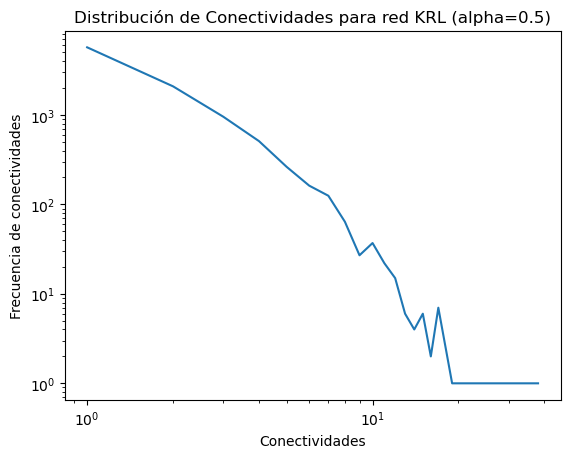

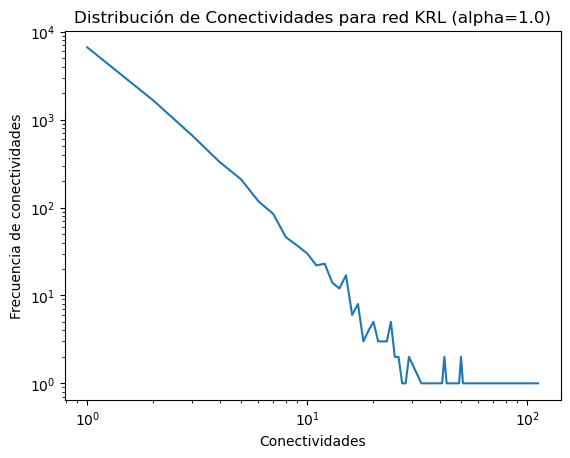

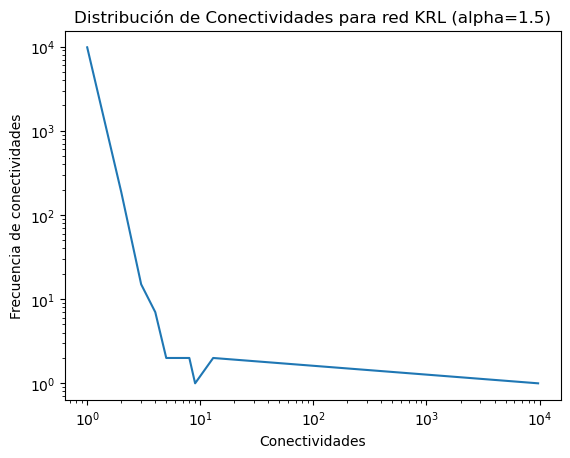

In [73]:
# Damos un nuevo tamaño de alpha

n = 10000

# Obtendremos la distribución de las redes para cada alpha
for alpha in valores_alpha:
    G = red_krl(n,alpha)
    # Obtenemos los grados de cada red
    distribucion_conectividades = [node.degree() for node in G.nodes.values()]
    # Obtenemos la frecuencia para cada posible conectividad de la red
    frecuencia_conectividades = np.bincount(distribucion_conectividades)
    conectividades = np.arange(len(frecuencia_conectividades))
    # Omitimos las conectividades con frecuencia igual a cero
    plt.plot(conectividades[frecuencia_conectividades != 0], frecuencia_conectividades[frecuencia_conectividades != 0])
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Distribución de Conectividades para red KRL (alpha={alpha})')
    plt.xlabel('Conectividades')
    plt.ylabel('Frecuencia de conectividades')
    plt.show()
    